# Starting Python with Game of Thrones

For this project, we will use a structured dataset that lists deaths ocurred on screen in the Game of Thrones series 

Our goal is to visualize with Python libraries (pandas, matplotlib) the answer to these questions: 

- What house murdered the most people? 
- Of the deaths ocurred in Winterfell, who were the deadliest characters? 

This is my very first jupyter notebook and attempt to handle some "real-life" data, hence the simplicity of the questions we´re answering. 

Let´s  first import the libraries required (and I´ve also included here a link to cheat sheets because I´m just starting): 
- Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool. https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- Matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf 
- Seaborn:  is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
%matplotlib inline

Let´s import the file where our data is located. I´ll use the pandas `pd.read_excel` function to read the excel file we´re using. Let´s also use the `.head()` attribute to see how our data looks like. 

In [4]:
dataset = pd.read_excel('https://query.data.world/s/fb74lcapr6o7viuvfnmrpi6lehp6lb')
dataset.head()

,Name,Allegiance,Season,Episode,Location,Killer,Killers House,Method,Death No.
0,Waymar Royce,Night's Watch,1,1,Beyond the Wall,White Walker,None,Ice sword,1
1,Gared,Night's Watch,1,1,Beyond the Wall,White Walker,None,Ice sword,2
2,Will,Night's Watch,1,1,Winterfell,Ned Stark,House Stark,Sword,3
3,Stag,None,1,1,Winterfell,Direwolf,None,Teeth,4
4,Direwolf,None,1,1,Winterfell,Stag,None,Antler,5


Let´s obtain some insights with the describe function from Pandas. We´re using the function `type()` to see the type of the dataset we have just created, and the method `.describe()` to see general information such as the count, mean, standard deviation, maximum value etc. of each numeric column. 

In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
dataset.describe()

,Season,Episode,Death No.
count,2224.000000,2224.000000,2224.000000
mean,6.248201,5.959982,1112.500000
std,2.001685,2.503927,642.157821
min,1.000000,1.000000,1.000000
25%,5.000000,5.000000,556.750000
50%,7.000000,5.000000,1112.500000
75%,8.000000,9.000000,1668.250000
max,8.000000,10.000000,2224.000000


Now let´s see the deaths per location, we´re using the `.value_counts()` method from pandas in order to obtain the number of murders by Location, Killer, Killers House. 

In [8]:
deaths_house = dataset["Killers House"]
deaths_house.value_counts().head(10)

House Targaryen                      1148
House Lannister                       296
House Stark                           184
White Walkers                          79
House Bolton                           76
Night's Watch                          69
Free Folk                              62
House Greyjoy                          44
Sons of the Harpy                      38
House Baratheon of King's Landing      34
Name: Killers House, dtype: int64

Although for the graphs we´re creating we won´t need this column, let´s test how the `for` loop works, and to complete our dataset with the quantity of deaths ocurred per each log, let´s add a new column to the dataset with the method `append()`. 


In [4]:
# Create a numeric count of the deaths ocurred to add to the dataset
Death_count = []

for i in range(2224):
    deaths = 1
    Death_count.append(deaths)

dataset["Death_count"] = Death_count

In [16]:
dataset.head()

,Name,Allegiance,Season,Episode,Location,Killer,Killers House,Method,Death No.,Death_count
0,Waymar Royce,Night's Watch,1,1,Beyond the Wall,White Walker,None,Ice sword,1,1
1,Gared,Night's Watch,1,1,Beyond the Wall,White Walker,None,Ice sword,2,1
2,Will,Night's Watch,1,1,Winterfell,Ned Stark,House Stark,Sword,3,1
3,Stag,None,1,1,Winterfell,Direwolf,None,Teeth,4,1
4,Direwolf,None,1,1,Winterfell,Stag,None,Antler,5,1


Now let´s use matplotlib capabilities to draw the top 10 houses that murdered the most during the whole series. 

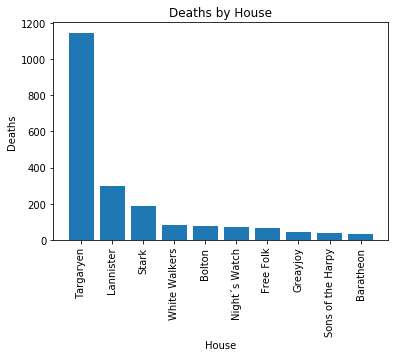

In [10]:
#Creating the plot & setting up the data we´re plotting, in this case, the value count of deaths ocurred per Killers House, as each log represents one death. 
fig, ax = plt.subplots()
data = dataset["Killers House"].value_counts().head(10)

#Setting the x & y axis to the index and values of our "data" series 
x_data = data.index
y_data = data.values

#Plotting the data itself 
ax.bar(x_data , y_data)

#Adding shorter labels to the top 10 visualized for improved readability 
Labels = ["Targaryen", "Lannister", "Stark", "White Walkers", "Bolton", "Night´s Watch", "Free Folk", "Greayjoy", "Sons of the Harpy", "Baratheon"]

#Customizing other aspects of the graph such as Title, labels, and the ° rotation of the x axis labels. 
ax.set_title("Deaths by House") 
ax.set_xlabel("House") 
ax.set_ylabel("Deaths")
plt.xticks(x_data, labels = Labels, rotation=90)
plt.show()

To test `cm.rainbow()` from matplotlib let´s add a color from the rainbow for each of the columns plotted before. We will use the numpy `np.linspace` to generate numbers from 0 to 1 based on the lenght of the data we´re plotting to assign the colors. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

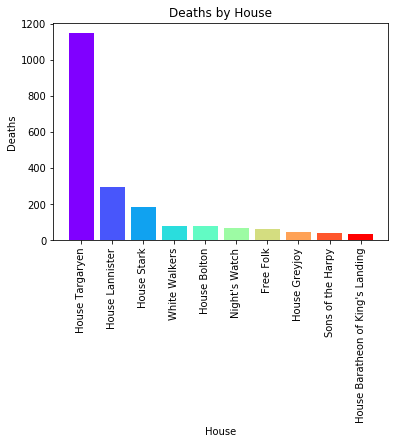

In [59]:
fig, ax = plt.subplots()
data = dataset["Killers House"].value_counts().head(10)

x_data = data.index
y_data = data.values


#plotting the bar charg using the color argument and cm.rainbow from matplotlib 
ax.bar(x_data , y_data, color = cm.rainbow(np.linspace(0,1, len(data))))

ax.set_title("Deaths by House") 
ax.set_xlabel("House") 
ax.set_ylabel("Deaths")
plt.xticks(label=Labels, rotation=90)

This looks really nice, but I believe that the colors on a graph should be used meaningfully.  
Hence I´ll create a graph were only the most relevant datapoint gets a color, and the rest remains on gray, following some of the data visualization suggestions made in the book "Storytelling with data". 

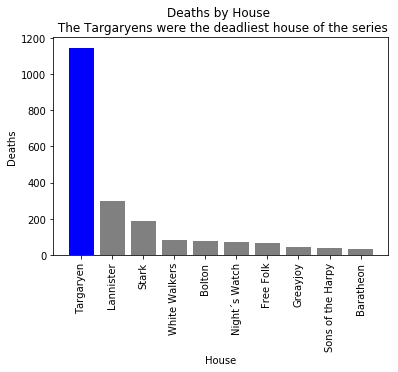

In [11]:
fig, ax = plt.subplots()
data = dataset["Killers House"].value_counts().head(10).index
data1 = dataset["Killers House"].value_counts().head(1)
data2 = dataset["Killers House"].value_counts().head(10).tail(9)

x_data1 = data1.index
y_data1 = data1.values

x_data2 = data2.index
y_data2 = data2.values


ax.bar(x_data1 , y_data1, color="blue")
ax.bar(x_data2 , y_data2, color="gray")

ax.set_title("Deaths by House \n The Targaryens were the deadliest house of the series") 
ax.set_xlabel("House") 
ax.set_ylabel("Deaths")
plt.xticks(data, labels = Labels, rotation=90)
plt.show()

Now let´s find out the answer of our second question, Of the deaths ocurred in Winterfell, who were the deadliest characters?  
Let´s first check how many deaths ocurred in Winterfell through `value_counts()` and let´s see if within the Top 10 locations it´s Winterfell with `.head()`

In [6]:
deaths_location = dataset["Location"]
deaths_location.value_counts().head(10)

King's Landing     1170
Roseroad            207
Winterfell          169
Meereen             136
The Twins            89
Beyond the Wall      78
Castle Black         66
The Narrow Sea       35
Riverlands           28
The Wall             26
Name: Location, dtype: int64

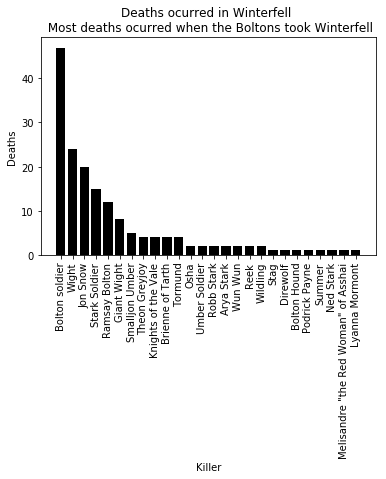

In [14]:
#Creating subset of our dataset, to include only deaths ocurred in Winterfell
data_winterfell = dataset[dataset["Location"].isin(["Winterfell"])].sort_values("Killer")
winterfell_killers = data_winterfell["Killer"].value_counts()

#Setting the x & y axis to the index and values of our "winterfell_killers" series 
wfk_index= winterfell_killers.index
wfk_values= winterfell_killers.values

#Plotting the bargraph with some customizations
fig, ax = plt.subplots()

ax.bar(wfk_index, wfk_values, color = "black")

ax.set_title("Deaths ocurred in Winterfell \n Most deaths ocurred when the Boltons took Winterfell")
ax.set_xlabel("Killer") 
ax.set_ylabel("Deaths")
plt.xticks(rotation=90)
plt.show()


So we have answered our initial questions! This is my first ever fully owned jupyter notebook, with my first real-life attempts to handle and graph some data. It took me a lot of time but now I´m way more confident in the use of matplotlib to make some visualizations of the data at hand. 
I´m a newbie with no background in computer science, so if you see anything that I could have done better let me know! My github user is SanieRojas. 